In [25]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [26]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    operator1 : str
    number3 : int
    number4 : int
    operator2 : str
    result : str


In [34]:
#Stage 1

def adder(state: AgentState) -> AgentState:
    """Adds two numbers."""
    state["result"] = str(state["number1"] + state["number2"])
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtracts two numbers."""
    state["result"] = str(state["number1"] - state["number2"])
    return state

def multiplier(state: AgentState) -> AgentState:
    """Multiplies two numbers."""
    state["result"] = str(state["number1"] * state["number2"])
    return state

def divider(state: AgentState) -> AgentState:
    """Divides two numbers."""
    if state["number2"] == 0:
        state["result"] = "Cannot divide by zero"
    else:
        state["result"] = str(state["number1"] / state["number2"])
    return state

def decider(state: AgentState) -> str:
    """Decides which operation to perform based on the operator."""
    if state["operator1"] == "+":
        return "addition"
    elif state["operator1"] == "-":
        return "subtraction"
    elif state["operator1"] == "*":
        return "multiplication"
    elif state["operator1"] == "/":
        return "division"
    else:
        raise ValueError("Unknown operator")

In [35]:
#Stage 2

def adder2(state: AgentState) -> AgentState:
    """Adds two numbers."""
    state["result"] = str(state["number1"] + state["number2"])
    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtracts two numbers."""
    state["result"] = str(state["number1"] - state["number2"])
    return state

def multiplier2(state: AgentState) -> AgentState:
    """Multiplies two numbers."""
    state["result"] = str(state["number1"] * state["number2"])
    return state

def divider2(state: AgentState) -> AgentState:
    """Divides two numbers."""
    if state["number2"] == 0:
        state["result"] = "Cannot divide by zero"
    else:
        state["result"] = str(state["number1"] / state["number2"])
    return state

def decider2(state: AgentState) -> str:
    """Decides which operation to perform based on the operator."""
    if state["operator2"] == "+":
        return "addition"
    elif state["operator2"] == "-":
        return "subtraction"
    elif state["operator2"] == "*":
        return "multiplication"
    elif state["operator2"] == "/":
        return "division"
    else:
        raise ValueError("Unknown operator")

In [36]:
graph = StateGraph(AgentState)

graph.add_node("adder_node1", adder)
graph.add_node("subtractor_node1", subtractor)
graph.add_node("multiplier_node1", multiplier)
graph.add_node("divider_node1", divider)
graph.add_node("decider_node1", lambda state: state)
graph.add_node("adder_node2", adder2)
graph.add_node("subtractor_node2", subtractor2)
graph.add_node("multiplier_node2", multiplier2)
graph.add_node("divider_node2", divider2)
graph.add_node("decider_node2", lambda state: state)

graph.add_edge(START, "decider_node1")
graph.add_conditional_edges(
    "decider_node1",
    decider, {
        "addition": "adder_node1",
        "subtraction": "subtractor_node1",
        "multiplication": "multiplier_node1",
        "division": "divider_node1"
    })

graph.add_edge("adder_node1", "decider_node2")
graph.add_edge("subtractor_node1", "decider_node2")
graph.add_edge("multiplier_node1", "decider_node2")
graph.add_edge("divider_node1", "decider_node2")

graph.add_conditional_edges(
    "decider_node2",
    decider2, {
        "addition": "adder_node2",
        "subtraction": "subtractor_node2",
        "multiplication": "multiplier_node2",
        "division": "divider_node2"
    })

graph.add_edge("adder_node2", END)
graph.add_edge("subtractor_node2", END)
graph.add_edge("multiplier_node2", END)
graph.add_edge("divider_node2", END)

app = graph.compile()

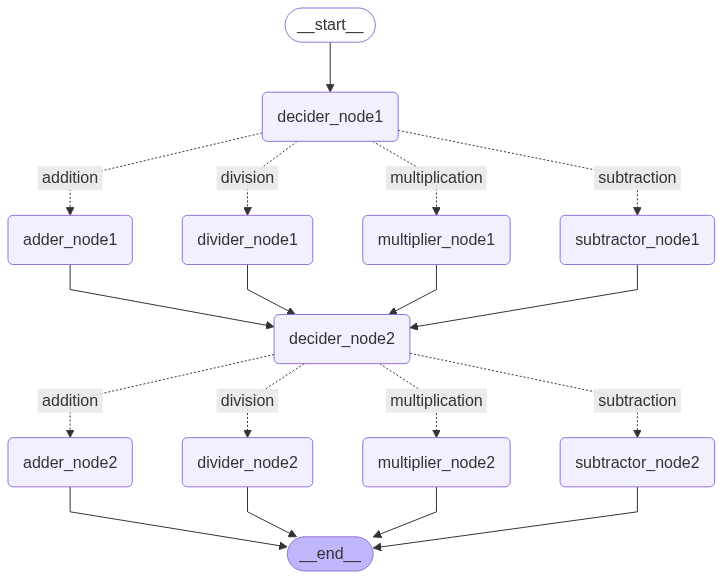

In [32]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png(), format='png'))

In [37]:
app.invoke({"number1": 10, "number2": 5, "operator1": "+", "number3": 10, "number4": 5, "operator2": "-"})

{'number1': 10,
 'number2': 5,
 'operator1': '+',
 'number3': 10,
 'number4': 5,
 'operator2': '-',
 'result': '5'}